In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm

In [8]:
#import to pandas
data_file = open("wyniki_utf.txt")
results = pd.read_csv(data_file,header=None,sep=" ")
names = ["solution_depth","example_no","algorithm","policy","path_length","visited","processed","recursed","time"]
results.columns=names
results.head()

,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time
0,1,1,astr,hamm,1,1,2,1,0.02
1,1,1,astr,manh,1,1,2,1,0.00
2,1,1,bfs,drlu,1,1,1,1,0.00
3,1,1,bfs,drul,1,1,1,1,0.00
4,1,1,bfs,ludr,1,1,3,1,0.00


In [9]:
#When patch not found replace path_length with recursion depth
no_solution = results[results.path_length==-1]
results = results.replace({-1:20})
no_solution

,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time


In [10]:
def get_color_iter(lenght):
    return iter(cm.Dark2(np.linspace(0, 1, lenght)))


In [11]:
column_chart_name={
    "visited":"Średnia ilość odwiedzonych stanów",
    "path_length":"Średnia długość rozwiązania",
    "processed":"Średnia ilość przetworzonych stanów",
    "recursed":"Średnia maksymalna głębokość rekursji",
    "time":"Średnia czas przetwarzania [s]"
}

In [12]:
def resultAlgFromStr(alg_name):
    return results[results.algorithm == str(alg_name)]

In [15]:

def plotThreeAlgs(series_name):
    width = 0.25
    bfs_avg = avg("bfs",series_name)
    dfs_avg = avg("dfs",series_name)
    astr_avg = avg("astr",series_name)

    max_solution_depth = max(results.solution_depth)
    pos = np.arange(max_solution_depth)+1
    colors= get_color_iter(2)
    plt.bar(pos-(width*1.5),bfs_avg,width,label="bfs", color = next(colors),align="edge")
    plt.bar(pos,dfs_avg,width,label="dfs", color = "lime")
    plt.bar(pos+width*0.5,astr_avg,width,label="astr", color = next(colors),align="edge")
    plt.minorticks_on()
    plt.grid(True,which="major",axis="y",ls="--", color="black")
    plt.legend(title="ALgorytm:")
    plt.xlabel("Głębokość rozwiązania")

In [16]:
def plot_all_algs(series_name,ycale="log"):
    plotThreeAlgs(series_name)
    plt.ylabel(column_chart_name[series_name])
    plt.title("Wszystkie algorytmy: "+ column_chart_name[series_name])
    plt.yscale(ycale)
    plt.savefig("ALL_"+series_name)
    plt.show()

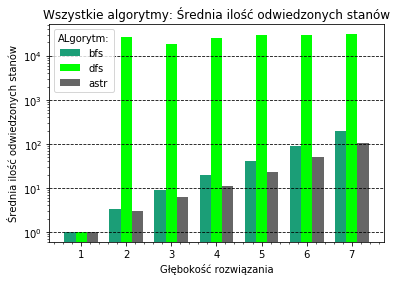

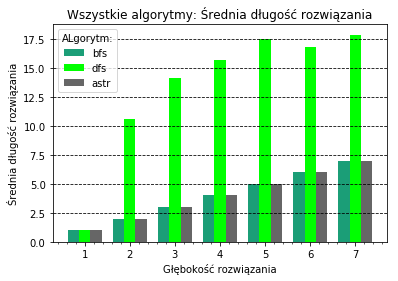

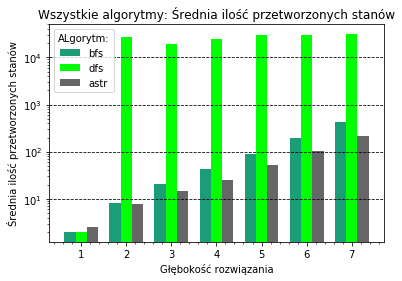

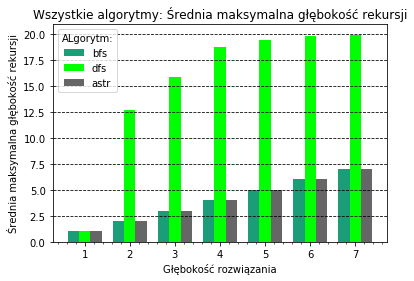

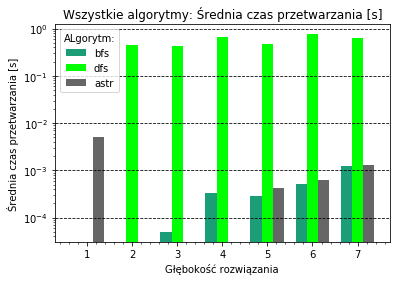

In [17]:
plot_all_algs("visited")
plot_all_algs("path_length","linear")
plot_all_algs("processed")
plot_all_algs("recursed","linear")
plot_all_algs("time")

In [19]:
overview = results.groupby(["algorithm","solution_depth"]).mean()
overview

example_no  path_length       visited     processed  \
algorithm solution_depth                                                        
astr      1                      1.5     1.000000      1.000000      2.500000   
          2                      2.5     2.000000      3.000000      7.625000   
          3                      5.5     3.000000      6.150000     14.600000   
          4                     12.5     4.000000     10.916667     25.145833   
          5                     27.5     5.000000     23.250000     51.648148   
          6                     54.0     6.000000     49.074766    105.341121   
          7                    106.5     7.000000    103.629717    220.028302   
bfs       1                      1.5     1.000000      1.000000      2.000000   
          2                      2.5     2.000000      3.250000      8.000000   
          3                      5.5     3.000000      8.900000     20.300000   
          4                     12.5     4.000000     19.750000     43.250000   
          5                     27.5     5.000000     41.166667     89.157407   
          6                     54.0     6.000000     90.378505    192.380841   
          7                    106.5     7.000000    199.751179    422.035967   
dfs       1                      1.5     1.000000      1.000000      2.000000   
          2                      2.5    10.625000  26538.500000  26547.000000   
          3                      5.5    14.150000  18805.725000  18817.925000   
          4                     12.5    15.666667  24905.932292  24919.265625   
          5                     27.5    17.509259  29034.490741  29048.828704   
          6                     54.0    16.775701  29531.928738  29545.573598   
          7                    106.5    17.849057  30780.257075  30795.090802   

                           recursed      time  
algorithm solution_depth                       
astr      1                1.000000  0.005000  
          2                2.000000  0.000000  
          3                3.000000  0.000000  
          4                4.000000  0.000000  
          5                5.000000  0.000426  
          6                6.000000  0.000621  
          7                7.000000  0.001330  
bfs       1                1.000000  0.000000  
          2                2.000000  0.000000  
          3                3.000000  0.000050  
          4                4.000000  0.000339  
          5                5.000000  0.000294  
          6                6.000000  0.000515  
          7                7.000000  0.001222  
dfs       1                1.000000  0.000000  
          2               12.625000  0.454844  
          3               15.825000  0.436062  
          4               18.708333  0.659505  
          5               19.412037  0.480639  
          6               19.771028  0.757720  
          7               19.908019  0.625811

In [20]:
overview2 = results.groupby(["solution_depth","algorithm"],as_index=False).mean()
overview2

,solution_depth,algorithm,example_no,path_length,visited,processed,recursed,time
0,1,astr,1.5,1.000000,1.000000,2.500000,1.000000,0.005000
1,1,bfs,1.5,1.000000,1.000000,2.000000,1.000000,0.000000
2,1,dfs,1.5,1.000000,1.000000,2.000000,1.000000,0.000000
3,2,astr,2.5,2.000000,3.000000,7.625000,2.000000,0.000000
4,2,bfs,2.5,2.000000,3.250000,8.000000,2.000000,0.000000
5,2,dfs,2.5,10.625000,26538.500000,26547.000000,12.625000,0.454844
6,3,astr,5.5,3.000000,6.150000,14.600000,3.000000,0.000000
7,3,bfs,5.5,3.000000,8.900000,20.300000,3.000000,0.000050
8,3,dfs,5.5,14.150000,18805.725000,18817.925000,15.825000,0.436062
9,4,astr,12.5,4.000000,10.916667,25.145833,4.000000,0.000000


In [22]:
bad_bfs = results[(results.solution_depth!=results.path_length)]
bad_bfs[bad_bfs.algorithm=="bfs"]

,solution_depth,example_no,algorithm,policy,path_length,visited,processed,recursed,time


In [23]:
overview3 = results.groupby(["algorithm","solution_depth","policy"],as_index=False).mean()
overview3.head()

,algorithm,solution_depth,policy,example_no,path_length,visited,processed,recursed,time
0,astr,1,hamm,1.5,1.0,1.0,2.50,1.0,0.01
1,astr,1,manh,1.5,1.0,1.0,2.50,1.0,0.00
2,astr,2,hamm,2.5,2.0,2.0,5.25,2.0,0.00
3,astr,2,manh,2.5,2.0,4.0,10.00,2.0,0.00
4,astr,3,hamm,5.5,3.0,3.0,7.80,3.0,0.00


In [27]:
    astr = overview3[overview3.algorithm=="astr"]
    astr = astr.drop(["example_no"],axis = 1)
    hamm= astr[astr.policy=="hamm"]
    manh = astr[astr.policy=="manh"]
    manh

,algorithm,solution_depth,policy,path_length,visited,processed,recursed,time
1,astr,1,manh,1.0,1.000000,2.500000,1.0,0.000000
3,astr,2,manh,2.0,4.000000,10.000000,2.0,0.000000
5,astr,3,manh,3.0,9.300000,21.400000,3.0,0.000000
7,astr,4,manh,4.0,17.750000,39.708333,4.0,0.000000
9,astr,5,manh,5.0,41.240741,90.185185,5.0,0.000685
11,astr,6,manh,6.0,91.242991,193.953271,6.0,0.001121
13,astr,7,manh,7.0,197.952830,417.929245,7.0,0.002406


In [28]:

def a_str_plot_series(series):
    width = 0.3
    colors= get_color_iter(2)
    plt.bar(manh.solution_depth-width/2,manh[series],width, label = "manhatan",color = next(colors))
    plt.bar(hamm.solution_depth+width/2,hamm[series],width, label = "hamminga", color = next(colors))
    plt.xlabel("Głębokość rozwiązania")
    plt.minorticks_on()
    plt.grid(True,which="major",axis="y",ls="--", color="black")
    plt.grid(True,which="minor",axis="y",ls="--")
    plt.legend(title="Metryki:")

In [29]:
def astr_plot(series_name,yscale="linear"):
    a_str_plot_series(series_name)
    plt.yscale(yscale)
    plt.ylabel(column_chart_name[series_name])
    plt.title("A*:"+column_chart_name[series_name])
    plt.savefig("ASTR_"+series_name)
    plt.show()

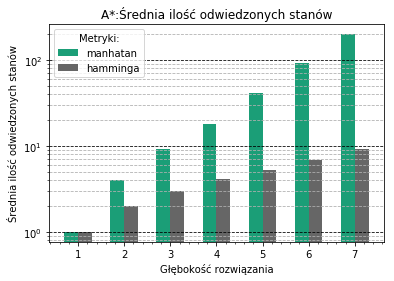

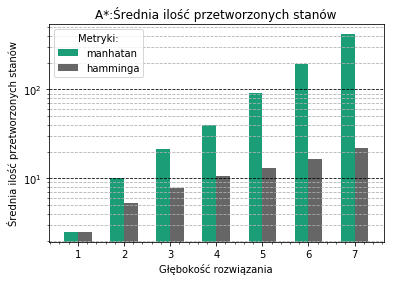

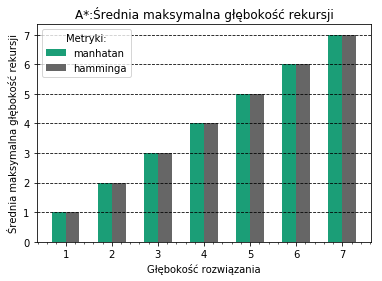

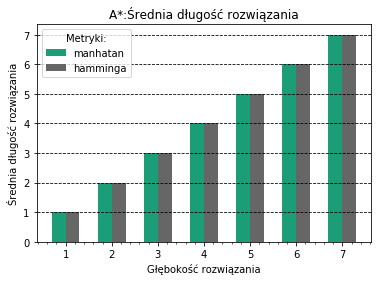

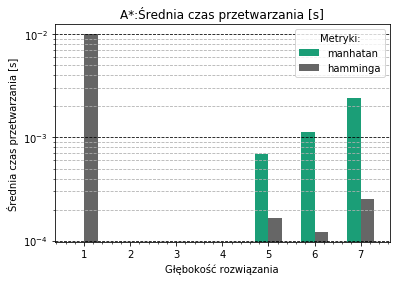

In [30]:
astr_plot("visited","log")
astr_plot("processed","log")
astr_plot("recursed")
astr_plot("path_length")
astr_plot("time","log")

In [31]:
def plot_multi_bar(df, series, ylabel, yscale="log"):
    plt.rc('xtick', labelsize=15)
    plt.rc('ytick', labelsize=15)
    plt.rc('legend', fontsize=12)
    plt.rc('axes', titlesize=15)
    
    fig = plt.figure(figsize=(18,5),dpi=400)
    ax1 = fig.add_subplot(111)

    bar_x_tick = []
    bar_x_label =[]
    bar_width = 0.1
    
    policies = list(set(df.policy))
    policy_len = len(policies)
    
    bar_number = policy_len
    start_x = np.arange(1,policy_len)-(bar_number*bar_width)/2
    colors = get_color_iter(policy_len)
    
    for no,pol in enumerate(policies):
        data = df[df.policy==pol]
        bar_pos = start_x+no*bar_width
        bar_x_tick.extend(bar_pos)
        bar_x_label.extend([pol]*7)
        ax1.bar(bar_pos,
                data[series],
                bar_width,
                align="edge",
                label = pol,
                color=next(colors))

    ax1.set_xlabel("Porządki przechodzenia")
    ax1.grid(True)

    ax2 = ax1.twiny()
    ax2.set_xlabel("Głębokość rozwiązania")
    ax1.set_ylabel(ylabel)

    ax2.set_xticks(range(0,8))
    ax2.set_xbound(ax1.get_xbound())
    ax1.set_xticks(bar_x_tick)

    ax1.set_xticklabels(bar_x_label, rotation='vertical')
    ax1.set_yscale(yscale)
    ax1.legend(title="Porządki:")

In [32]:
bfs = overview3[overview3.algorithm=="bfs"]

dfs = overview3[overview3.algorithm=="dfs"]

In [ ]:
def plot_dfs(data_series,yscale="log"): 
    plot_multi_bar(dfs,data_series,column_chart_name[data_series],yscale)
    plt.title("DFS:"+column_chart_name[data_series])
    plt.savefig("DFS_"+data_series, bbox_inches='tight')
    plt.show()

In [ ]:
def plot_bfs(data_series,yscale="log"): 
    plot_multi_bar(bfs,data_series,column_chart_name[data_series],yscale)
    plt.title("BFS:"+column_chart_name[data_series])
    plt.savefig("BFS_"+data_series, bbox_inches='tight')
    plt.show()

In [ ]:
plot_dfs("visited")
plot_dfs("path_length","linear")
plot_dfs("processed")
plot_dfs("recursed","linear")
plot_dfs("time")

In [ ]:
plot_bfs("visited")
plot_bfs("path_length","linear")
plot_bfs("processed")
plot_bfs("recursed","linear")
plot_bfs("time")